### Step 1: <span style="color:green">Import Libraries</span> 


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

In [4]:
airbnb = pd.read_csv("airbnb_2.csv")

In [5]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:green">EDA </span> 


<b> How many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and which Neighbourhood Groups has the largest number of Airbnb Listings? </b>


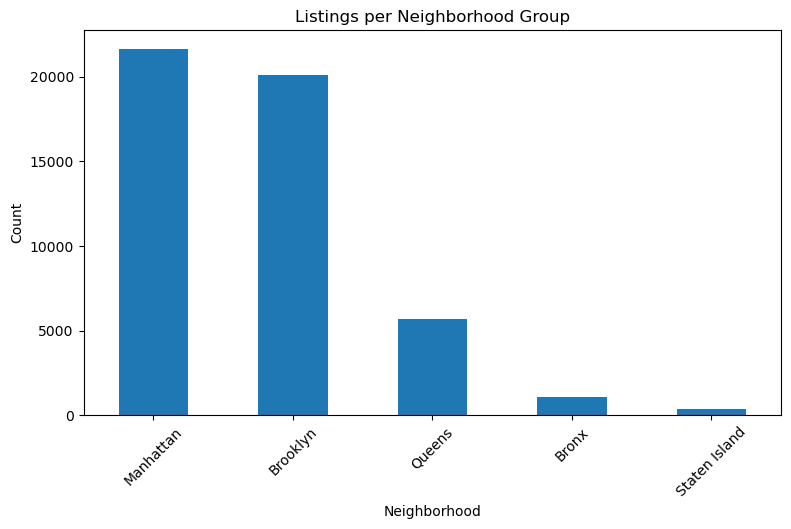

In [26]:
neighborhood_listings= airbnb["neighbourhood_group"].value_counts()
sorted_listings = neighborhood_listings.sort_values(ascending = False)
ax1 = sorted_listings.plot(kind="bar", figsize = (9,5))
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Listings per Neighborhood Group')

plt.show()

<b> The Neighbourhood Groups that have the top 3 number of Airbnb Listings. The % listings that each Neighbourhood Group contains. </b>



In [14]:
neighborhood_listings= airbnb["neighbourhood_group"].value_counts(sort=True, normalize=True)
print(neighborhood_listings)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64


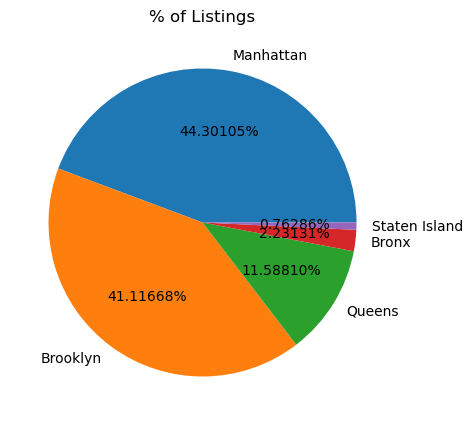

In [23]:
plt.figure(figsize=(5,5))
plt.pie(neighborhood_listings, labels=neighborhood_listings.index, autopct='%1.5f%%')
plt.title('% of Listings')
plt.show()

In [25]:
airbnb["revenue"]= (airbnb["price"]*airbnb["number_of_reviews"])
grouped_revenue= airbnb.groupby('neighbourhood_group')['revenue'].sum().sort_values(ascending = False)
print(grouped_revenue)

neighbourhood_group
Manhattan        73126682
Brooklyn         58855815
Queens           13599256
Bronx             2181389
Staten Island      948078
Name: revenue, dtype: int64


<b> Created a new calculated field called Revenue and placed this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>


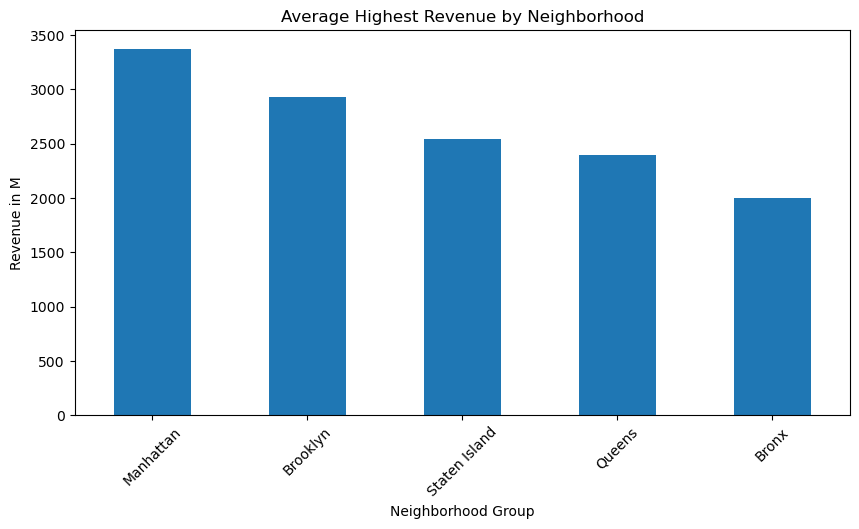

In [36]:
avg_highest_revenues=airbnb.groupby("neighbourhood_group")["revenue"].mean().sort_values(ascending = False)
avg_highest_revenues.plot(kind="bar", figsize=(10,5))
plt.xlabel("Neighborhood Group")
plt.ylabel("Revenue in M")
plt.xticks(rotation=45)
plt.title("Average Highest Revenue by Neighborhood")
plt.show()


<b> Bar Plot that shows which Neighbourhood Group has the highest average revenues.


<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    
Identified the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups. 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

In [38]:
top_3 = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]
group_hood = top_3.groupby(['neighbourhood_group', 'neighbourhood']).agg({'revenue': 'sum'}).reset_index()
top_hood = group_hood.groupby('neighbourhood_group').apply(lambda x: x.nlargest(3, 'revenue')).reset_index(drop=True)

top_hood

,neighbourhood_group,neighbourhood,revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
2,Brooklyn,Bushwick,4762224
3,Manhattan,Harlem,8598692
4,Manhattan,Hell's Kitchen,8238991
5,Manhattan,East Village,7574535
6,Queens,Astoria,1880840
7,Queens,Long Island City,1374945
8,Queens,Flushing,1140450


<b>Building on the previous question I identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, and filtered the Airbnb Dataframe to include only the top neighbourhoods. 
    
Identified the  top average revenue generating room type for each of the nine neighbourhoods in a Bar Chart.</b>
  

In [43]:
filtered_df = df[df['neighbourhood'].isin(top_hood['neighbourhood'])]
avg_revenue = filtered_df.groupby(['neighbourhood_group', 'neighbourhood', 'room_type']).agg({'revenue' : 'mean'}).reset_index()
top_rooms = avg_revenue.groupby(['neighbourhood_group', 'neighbourhood']).apply(lambda x: x.nlargest(1, 'revenue')).reset_index(drop=True)


In [71]:
top_rooms['neigh_room'] = (top_rooms['neighbourhood'] + ' (' + top_rooms['room_type'] + ')')
top_sorted = top_rooms.sort_values('revenue', ascending = False).reset_index()
top_sorted['revenue']=top_sorted['revenue'].astype(float)
top_sorted


,index,neighbourhood_group,neighbourhood,room_type,revenue,neigh_room_type,neigh_room
0,0,Brooklyn,Bedford-Stuyvesant,Bedford-Stuyvesant (Entire home/apt),5923.995600,Bedford-Stuyvesant (Entire home/apt),Bedford-Stuyvesant (Bedford-Stuyvesant (Entire...
1,4,Manhattan,Harlem,Harlem (Entire home/apt),4991.899614,Harlem (Entire home/apt),Harlem (Harlem (Entire home/apt))
2,7,Queens,Flushing,Flushing (Entire home/apt),4879.349057,Flushing (Entire home/apt),Flushing (Flushing (Entire home/apt))
3,3,Manhattan,East Village,East Village (Entire home/apt),4871.841880,East Village (Entire home/apt),East Village (East Village (Entire home/apt))
4,5,Manhattan,Hell's Kitchen,Hell's Kitchen (Private room),4713.443452,Hell's Kitchen (Private room),Hell's Kitchen (Hell's Kitchen (Private room))
5,2,Brooklyn,Williamsburg,Williamsburg (Entire home/apt),4659.608673,Williamsburg (Entire home/apt),Williamsburg (Williamsburg (Entire home/apt))
6,1,Brooklyn,Bushwick,Bushwick (Entire home/apt),4128.241888,Bushwick (Entire home/apt),Bushwick (Bushwick (Entire home/apt))
7,8,Queens,Long Island City,Long Island City (Entire home/apt),3303.504167,Long Island City (Entire home/apt),Long Island City (Long Island City (Entire hom...
8,6,Queens,Astoria,Astoria (Entire home/apt),2845.629921,Astoria (Entire home/apt),Astoria (Astoria (Entire home/apt))


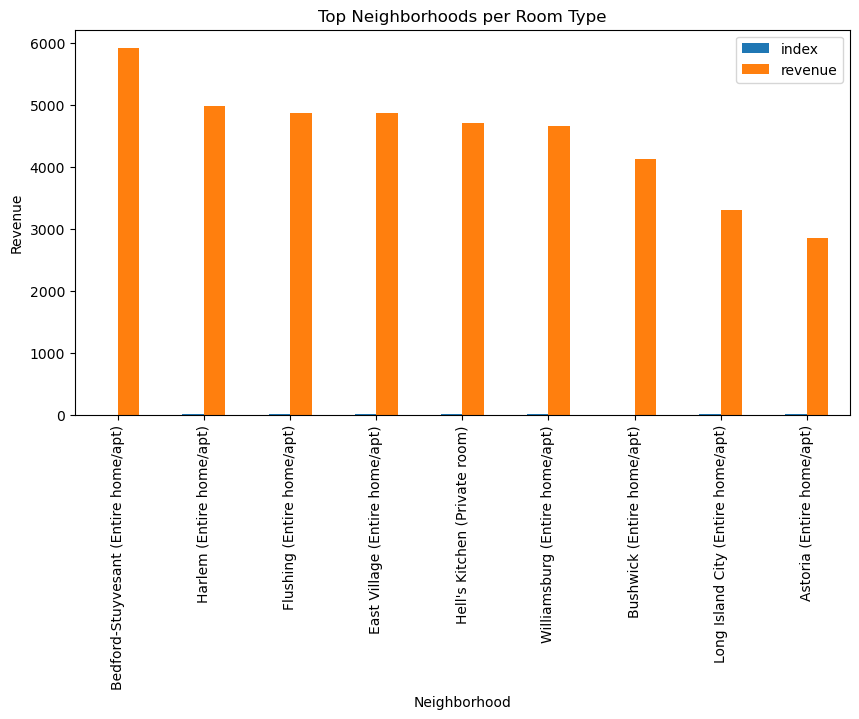

In [76]:
top_sorted.plot(kind='bar', x='room_type', figsize=(10,5))
plt.title("Top Neighborhoods per Room Type")
plt.ylabel('Revenue')
plt.xlabel('Neighborhood')
plt.show()